In [20]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Check the Python version
import sys
if sys.version.startswith("3."):
  print("You are running Python 3. Good job :)")
else:
  print("This notebook requires Python 3.\nIf you are using Google Colab, go to Runtime > Change runtime type and choose Python 3.")

You are running Python 3. Good job :)


In [22]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  # Clone the entire repo to access the files.
  !git clone -l -s https://github.com/epfml/OptML_course.git cloned-repo
  %cd cloned-repo/labs/ex02/template/

# Load the data

In [23]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

In [24]:
b.shape, A.shape


((10000,), (10000, 2))

# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Given an $ n \times d $ matrix $A$ and a $ n \times 1$ vector $b$, the goal is to find a vector $x \in \mathbb{R}^d$ which minimizes the objective function $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

In this exercise, we will try to fit $x$ using Least Squares Estimation. 

One can see the function is $L$ smooth with $L = \frac1n\|A\|^2$ (Corollary 2.5).

# Computing the Objective Function
Fill in the `calculate_objective` function below:

In [25]:
def calculate_objective(Axmb):
    """Calculate the mean squared error for vector Axmb = Ax - b."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute mean squared error
    n = Axmb.shape[0]
    error = np.linalg.norm(Axmb)**2/(2*n)
    return error
    # ***************************************************
    # raise NotImplementedError

# Compute smoothness constant $L$

To compute the spectral norm of A you can use np.linalg.norm(A, 2)

In [26]:
def calculate_L(b, A):
    """Calculate the smoothness constant for f"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute ||A.T*A||
    AtA_norm = np.linalg.norm(np.dot(A.T, A), 2)
    # ***************************************************
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute L = smoothness constant of f
    n = A.shape[0]
    L = (AtA_norm**2) / n
    # ***************************************************
    # raise NotImplementedError
    return L

# Gradient Descent

Please fill in the functions `compute_gradient` below:

In [27]:
def compute_gradient(b, A, x):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and objective
    Ax = np.dot(A, x)
    Axmb = Ax - b
    grad = np.dot(A.T, Axmb)
    # ***************************************************
    # raise NotImplementedError
    return grad, Axmb

Please fill in the functions `gradient_descent` below:

In [28]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and objective function
        grad, Axmb = compute_gradient(b, A, x)
        obj = calculate_objective(Axmb)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update x by a gradient descent step
        x = x - gamma * grad
        # ***************************************************
        # raise NotImplementedError
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

Test your gradient descent function with a naive step size through gradient descent demo shown below:

In [29]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50

gamma = 0.1

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=2792.236712759168
Gradient Descent(1/49): objective=2771299915.4772677
Gradient Descent(2/49): objective=2765760071591108.0
Gradient Descent(3/49): objective=2.760231317207979e+21
Gradient Descent(4/49): objective=2.7547136148048795e+27
Gradient Descent(5/49): objective=2.749206942288882e+33
Gradient Descent(6/49): objective=2.7437112776112446e+39
Gradient Descent(7/49): objective=2.7382265987672964e+45
Gradient Descent(8/49): objective=2.7327528837963597e+51
Gradient Descent(9/49): objective=2.7272901107816493e+57
Gradient Descent(10/49): objective=2.721838257850197e+63
Gradient Descent(11/49): objective=2.7163973031727537e+69
Gradient Descent(12/49): objective=2.710967224963709e+75
Gradient Descent(13/49): objective=2.7055480014810055e+81
Gradient Descent(14/49): objective=2.7001396110260454e+87
Gradient Descent(15/49): objective=2.6947420319436023e+93
Gradient Descent(16/49): objective=2.689355242621744e+99
Gradient Descent(17/49): objective=2.68397

Time Visualization

In [30]:
from ipywidgets import IntSlider, interact
from grid_search import *

def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives_naive, gradient_xs_naive, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

Try doing gradient descent with a better learning rate

In [31]:
# Define the parameters of the algorithm.
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
L = calculate_L(b, A)
# ***************************************************
gamma = 1 / L
# raise NotImplementedError

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=2792.236712759168
Gradient Descent(1/49): objective=15.385887868829403
Gradient Descent(2/49): objective=15.385887868829403
Gradient Descent(3/49): objective=15.385887868829403
Gradient Descent(4/49): objective=15.385887868829403
Gradient Descent(5/49): objective=15.385887868829403
Gradient Descent(6/49): objective=15.385887868829403
Gradient Descent(7/49): objective=15.385887868829403
Gradient Descent(8/49): objective=15.385887868829403
Gradient Descent(9/49): objective=15.385887868829403
Gradient Descent(10/49): objective=15.385887868829403
Gradient Descent(11/49): objective=15.385887868829403
Gradient Descent(12/49): objective=15.385887868829403
Gradient Descent(13/49): objective=15.385887868829403
Gradient Descent(14/49): objective=15.385887868829403
Gradient Descent(15/49): objective=15.385887868829403
Gradient Descent(16/49): objective=15.385887868829403
Gradient Descent(17/49): objective=15.385887868829403
Gradient Descent(18/49): objective=15.3

Time visualization with a better learning rate

In [32]:
def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives, gradient_xs, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# Loading more complex data
The data is taken from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength 

In [33]:
data = np.loadtxt("Concrete_Data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

In [34]:
b.shape, A.shape

((1030,), (1030, 8))

# Running gradient descent

## Assuming bounded gradients
Assume we are moving in a bounded region $\|x\| \leq 25$ containing all iterates (and we assume $\|x-x^\star\| \leq 25$ as well, for simplicity). Then by $\nabla f(x) = \frac{1}{n}A^\top (Ax - b)$, one can see that $f$ is Lipschitz over that bounded region, with Lipschitz constant $\|\nabla f(x)\| \leq \frac{1}{n} (\|A^\top A\|\|x\| + \|A^\top b\|)$

In [35]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute the bound on the gradient norm
# ***************************************************
n = A.shape[0]
grad_norm_bound = (1/n) * (np.linalg.norm(np.dot(A.T, A)) * 25 + np.linalg.norm(np.dot(A.T, b)))
# raise NotImplementedError

Fill in the learning rate assuming bounded gradients

In [36]:
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute learning rate based on bounded gradient
# ***************************************************
gamma = 1 / grad_norm_bound
# raise NotImplementedError

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
bd_gradient_objectives, bd_gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Averaging the iterates as is the case for bounded gradients case
bd_gradient_objectives_averaged = []
for i in range(len(bd_gradient_xs)):
    if i > 0:
        bd_gradient_xs[i] = (i * bd_gradient_xs[i-1] + bd_gradient_xs[i])/(i + 1)
    grad, err = compute_gradient(b, A, bd_gradient_xs[i])
    obj = calculate_objective(err) # 此处原代码为calculate_mse(err)，但似乎并不正确，改为calculate_objective(err) by 162150107_JGZ
    bd_gradient_objectives_averaged.append(obj)

Gradient Descent(0/49): objective=780.8686016504855
Gradient Descent(1/49): objective=10847.94620087758
Gradient Descent(2/49): objective=1575683.473455268
Gradient Descent(3/49): objective=285140676.35373974
Gradient Descent(4/49): objective=63486308664.263794
Gradient Descent(5/49): objective=18942638366648.113
Gradient Descent(6/49): objective=7469238566245391.0
Gradient Descent(7/49): objective=3.47735438039779e+18
Gradient Descent(8/49): objective=1.7384145737318654e+21
Gradient Descent(9/49): objective=8.91949500750863e+23
Gradient Descent(10/49): objective=4.617358861962334e+26
Gradient Descent(11/49): objective=2.397425523587222e+29
Gradient Descent(12/49): objective=1.246034728806469e+32
Gradient Descent(13/49): objective=6.478283357269092e+34
Gradient Descent(14/49): objective=3.3685124960209744e+37
Gradient Descent(15/49): objective=1.7515906845730894e+40
Gradient Descent(16/49): objective=9.108199881871182e+42
Gradient Descent(17/49): objective=4.736246757943926e+45
Gradien

## Gradient descent using smoothness
Fill in the learning rate using smoothness of the function

In [37]:
max_iters = 50


# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
L = calculate_L(b, A)
gamma = 1 / L
# raise NotImplementedError

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=780.8686016504855
Gradient Descent(1/49): objective=749.6255405219083
Gradient Descent(2/49): objective=730.9693161067969
Gradient Descent(3/49): objective=719.6244553850347
Gradient Descent(4/49): objective=712.5885212381744
Gradient Descent(5/49): objective=708.1300188250653
Gradient Descent(6/49): objective=705.2374794053843
Gradient Descent(7/49): objective=703.3121891591262
Gradient Descent(8/49): objective=701.9948012177332
Gradient Descent(9/49): objective=701.0664599820734
Gradient Descent(10/49): objective=700.3918253834885
Gradient Descent(11/49): objective=699.8858805451465
Gradient Descent(12/49): objective=699.4943665609062
Gradient Descent(13/49): objective=699.1821030081791
Gradient Descent(14/49): objective=698.9259212258179
Gradient Descent(15/49): objective=698.7103277531281
Gradient Descent(16/49): objective=698.5248043531318
Gradient Descent(17/49): objective=698.3621024370776
Gradient Descent(18/49): objective=698.2171502620128
Gra

## Plotting the Evolution of the Objective Function

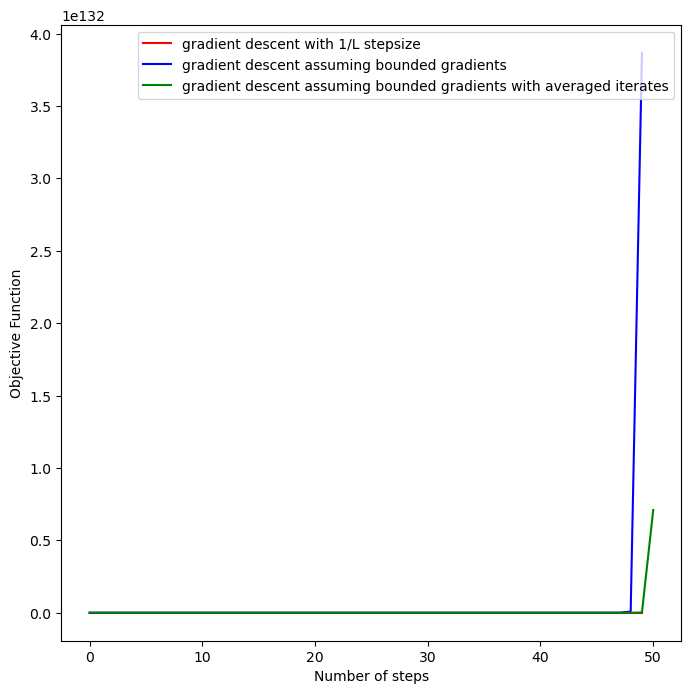

In [38]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(gradient_objectives)), gradient_objectives,'r', label='gradient descent with 1/L stepsize')
plt.plot(range(len(bd_gradient_objectives)), bd_gradient_objectives,'b', label='gradient descent assuming bounded gradients')
plt.plot(range(len(bd_gradient_objectives_averaged)), bd_gradient_objectives_averaged,'g', label='gradient descent assuming bounded gradients with averaged iterates')
plt.legend(loc='upper right')
plt.show()